This is the simple mock galaxy catalog made of randomly shaped and placed galaxies for testing purposes

In [3]:
import ngmix
from ngmix.medsreaders import NGMixMEDS
import numpy as np
import os
import time
from astropy.table import Table, vstack, hstack


import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame

import images
import meds
import subprocess
import psfex

In [ ]:
info = {
    "id": i,
    "bdf_pars": self.bdf_pars[i],
    "psf": self.psf,
    "pixel_scale": self.pixel_scale,
    "x_cen": self.x_cen[i],
    "y_cen": self.y_cen[i],
    "offset": self.offsets[i]
}

In [4]:
catalogs = []
catalog_tag = '/e/ocean1/users/vargatn/DES/SIM_DATA/SKY_MODEL_EPSILON/res_clust_v2_z0l0/epsilon_clust_v8-z0l0_15000_{:03d}.fits'
for i in np.arange(1):
    fname = catalog_tag.format(i)
    data = fio.read(fname)
    catalog_cluster = data[data['LOC'] == 1]
    catalog_field = data[data['LOC'] == 0]
    catalog = np.hstack((catalog_cluster, catalog_field))
    catalog['G1'] = 0.3
    catalog['G2'] = -0.2
    catalogs.append(catalog)

In [35]:
def toflux(mag):
    flux = 10**((mag - 30)/-2.5)
    return flux

In [ ]:
        self.bdf_pars[:, 2] = self.catalog["G1"][:]
        self.bdf_pars[:, 3] = self.catalog["G2"][:]
        self.bdf_pars[:, 5] = self.catalog["FRACDEV"][:]


(array([26., 33., 66., 59., 54., 57., 51., 28., 19.,  7.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02705594, 0.0994867 , 0.17191746, 0.24434822, 0.31677899,
        0.38920975, 0.46164051, 0.53407127, 0.60650204, 0.6789328 ,
        0.75136356, 0.82379432, 0.89622509, 0.96865585, 1.04108661,
        1.11351737, 1.18594814, 1.2583789 , 1.33080966, 1.40324043,
        1.47567119]),
 <BarContainer object of 20 artists>)

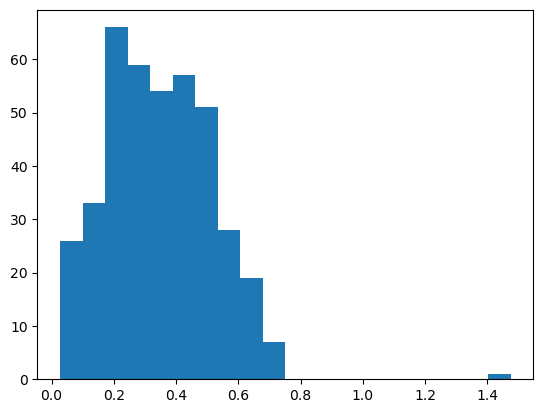

In [53]:
plt.hist(np.log10(catalog["TSIZE"][ii] + 1), bins=20)

In [ ]:
plt.hi

In [11]:
mock_catalog = pd.DataFrame()

In [ ]:
mock_catalog["X"] = np.random.uniform(padding, canvas_size - padding, size=nobjects)

In [57]:
np.random.seed(5000)
nobjects = 4000
canvas_size = 5000
padding = 200
# this is something of an artifact, the X, Y is starting at 0, not at the image center... might need to be fixed
mock_catalog["X"] = np.random.uniform(padding, canvas_size - padding, size=nobjects)
mock_catalog["Y"] = np.random.uniform(padding, canvas_size - padding, size=nobjects)
lsizes = np.random.normal(loc=0.4, scale=0.2, size=nobjects)
mock_catalog["TSIZE"] = 10**(lsizes - 1)
mock_catalog["FRACDEV"] = np.random.uniform(0, 1, size=nobjects)
mock_catalog["FLUX_I"] = toflux(np.random.normal(loc=20, scale=1, size=nobjects))

In [56]:
plt.histmock_catalog

,X,Y,TSIZE,FRACDEV,FLUX_I
0,1253.620180,4344.447238,0.218530,0.336923,23624.725313
1,1859.080890,518.343137,0.158967,0.434924,2738.203779
2,3547.203790,1070.972421,0.570126,0.878487,3798.690822
3,718.271902,3521.252210,0.247136,0.207697,23348.580957
4,2995.744990,2321.859566,0.444299,0.129720,2643.547536
...,...,...,...,...,...
3995,4743.384248,3012.204755,0.268485,0.114495,6869.136773
3996,731.823533,3713.119647,0.341644,0.788949,34827.740610
3997,4133.736390,4054.324519,0.181260,0.936873,35655.430341
3998,912.621282,942.510543,0.272736,0.708212,6953.693736


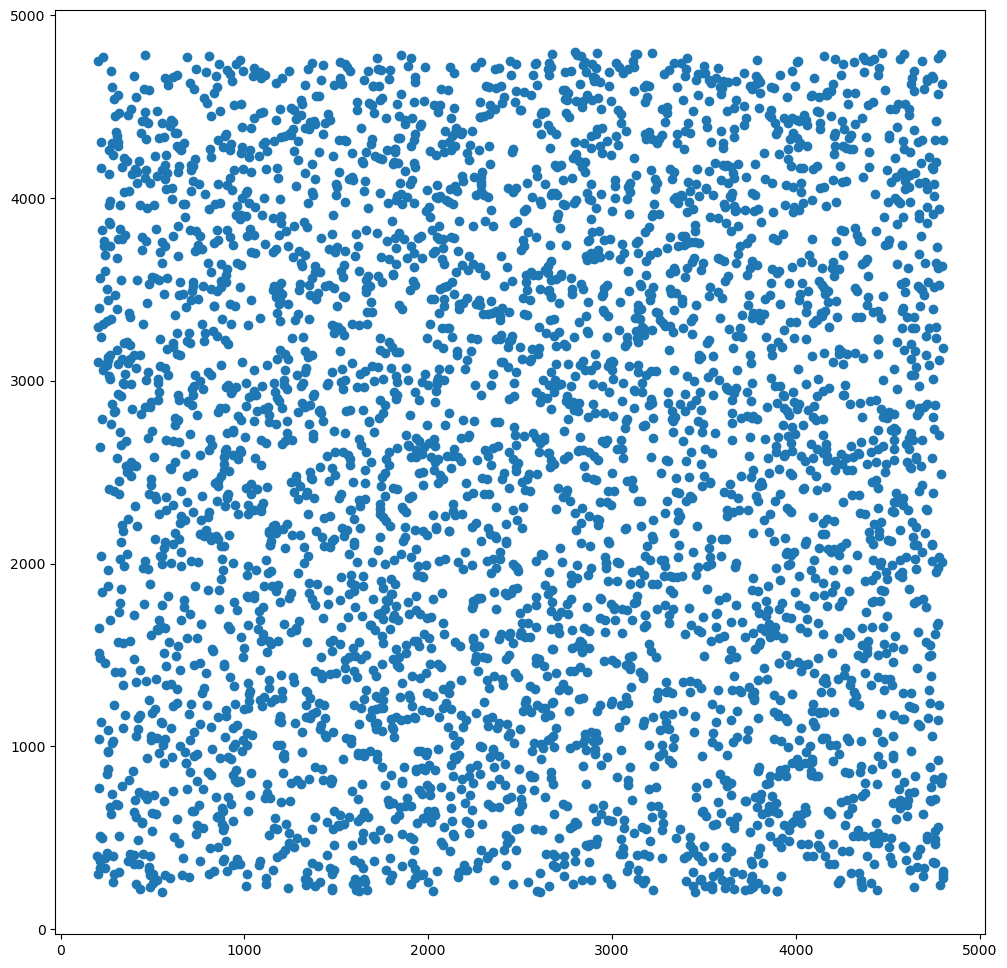

In [19]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(mock_catalog["X"], mock_catalog["Y"])